In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
from datasets.mnist import MNIST
from models.stylealae import StyleAlae

In [4]:
mnist = MNIST()
alae = StyleAlae({
    'latent_dim': 50,
    'num_layers': 4,
    'map_num_layers': 3,
    'init_channels': 4,
    'max_channels': 256,
    'out_channels': 1,
    'lr': 1e-4,
    'beta1': 0.0,
    'beta2': 0.99,
    'gamma': 10,
})

In [5]:
alae.load_weights('../ckpt/light_mnlayer3_epochs=10')

In [6]:
x_train, y_train = mnist.rawdata()
x_test, y_test = mnist.rawdata(train=False)
trainset = np.pad(x_train,
                  [[0, 0], [2, 2], [2, 2], [0, 0]],
                  'constant',
                  constant_values=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



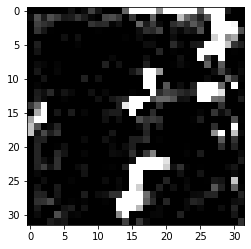

In [7]:
idx = 45
latent, image = alae(trainset[idx:idx + 1])
plt.imshow(np.clip(image.numpy()[0, ..., 0], -1, 1), cmap='gray')

In [8]:
idxA, idxB = 7, 36
latentA = alae.encode(trainset[idxA:idxA + 1])
latentB = alae.encode(trainset[idxB:idxB + 1])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



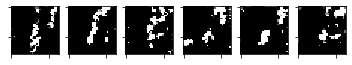

In [9]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA
for i in range(num + 1):
    image = alae.generate(latent)[0, ..., 0]
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

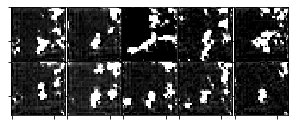

In [12]:
cherrypicked = [1, 3, 25, 7, 58, 65, 36, 52, 55, 45]
fig = plt.figure(figsize=(5, 2))
axs = [fig.add_subplot(2, 5, i + 1) for i in range(10)]

for i in range(10):
    ax = axs[i]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    
    idx = cherrypicked[i]
    latent, image = alae(trainset[idx:idx + 1])
    ax.imshow(np.clip(image[0, ..., 0], -1, 1), cmap='gray')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('enum', bbox_inches='tight', pad_inches=0)